<h1><center>Transfer Learning</center></h1>

<br>
<center><font size="3">This notebook is a part of teaching material for CS-EJ3311 - Deep Learning with Python</font></center>
<center><font size="3">24.10.-11.12.2022</font></center>
<center><font size="3">Aalto University & FiTech.io</font></center>

Assume you want to build an app that distinguishes between different dog breeds. This can be modeled as a classification problem which we can solve using a deep neural network. Indeed, we could train a deep neural network to predict the dog breed based on a large set of labeled images. The problem is that the number of labeled images required for accurate training scales with the number of parameters of the deep net. It might well be that we do not have enough training images for some (rare) breeds.

The idea of transfer learning is to exploit similarities between different machine learning problems. Loosely speaking, transfer learning allows borrowing statistical power from related problems for which we can collect more labeled data than for the ("target") problem at hand. 

For the dog breed classification problem, such a similar problem could be the classification of images as dog or cat. We might have access to large image databases of dog and cat images so we can reliably tune the weights of a deep net. If we have found weights for a deep net that allows distinguishing between dog and cat images, it might be a good starting point for adjusting the weights to further distinguish between different dog breeds. 

## Learning goals 

- to understand transfer learning and motivation for using it
- to learn main transfer learning strategies 
- to learn how to use transfer learning with pretrained CNN models


## Additional Materials

- Chapter 5.3 of "Deep Learning with Python" by F.Chollet. 
- Chapter 11 "Transfer learning with Keras" of "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow" by Aurélien Géron. 



- [A comprehensive guide to Transfer Learning](https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a)
- [A Survey on Transfer Learning](https://www.cse.ust.hk/~qyang/Docs/2009/tkde_transfer_learning.pdf)
- [Transfer Learning, Andrew Ng](https://www.youtube.com/watch?v=yofjFQddwHE)

 # What is Transfer Learning ?
 
Transfer learning is a machine learning technique in which a model trained for one particular task is used as a starting point for a training model for another task. Transfer learning enables us to utilize the knowledge (such as learned weights, features) from previously learned tasks and apply it to the new, but related task.  


For example, for the image classification task certain low-level features, such as edges, shapes, corners, and intensity, do not appears to be specific to a particular dataset or particular task. Such learned features can be shared across different image classification problems, thus enabling knowledge transfer among them. The following figure demonstrates the difference between traditional machine learning and transfer learning.

<figure> <img src="../../../coursedata/TransferLearning/Transfer_learning.png" width=800 alt="drawing"/ align='middle'/></figure>

<figcaption style="text-align:center" ><a href=https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a > Image source </figcaption>

# Why Transfer Learning?
Deep learning models are data-hungry - they need many training examples to learn the parameters of the network. This is one of the limiting aspects of deep neural networks and that is why transfer learning comes in handy. Transfer learning is a common and highly effective approach to train the model on a small image dataset by utilizing **pre-trained models**.  Furthermore, transfer learning helps to save training time, because the model is not trained from scratch. 

**Pre-trained model** is a deep learning architecture that is trained over a large dataset. Such models are trained for thousands of hours for a given benchmark dataset and all the parameters in the networks are learned. There are numbers of such pre-trained models available and anyone can use them depending on the particular problem.

Few examples of pre-trained models are:

- **For Computer Vision tasks**
    - VGG-16
    - VGG-19
    - Inception V3
    - XCeption
    - ResNet-50
    - MobileNet

- **For Natural Language Processing task**
    - Word2Vec
    - GloVe
    - FastText
    - Universal Sentence Encoder by Google
    - Bidirectional Encoder Representations from Transformers (BERT) by Google

# Key considerations for Transfer Learning

To effectively apply transfer learning we need to answer three main questions:

-  **What to transfer**: While applying transfer learning we need to understand what knowledge is common between the source and target task. We try to seek answers on what knowledge is specific to the source task and what can be transferred from the source task to the target task that will help improve the performance of the target task. 
-  **When to transfer**: We should apply transfer learning only when source and target domain are related. When the source and target domains are not related at all, applying transfer learning degrades target task performance. This type of transfer is called Negative Transfer. 
- **How to transfer**: Once we have answers to what to transfer and when to transfer, we can proceed to identify the actual ways of transferring the knowledge across domains/tasks. 

**So, when does transfer learning makes sense?** 

If we are trying to learn from **Task A** and transfer knowledge to **Task B**, transfer learning is useful in the following scenario:
- Task A and B have the similar input, e.g both have images as input. 
- There is a lot more data for Task A than Task B.
- Low-level features from A could be helpful in learning task B.

# Transfer Learning Strategies
There are two common ways to use pre-trained models:

1. To use a pre-trained model as a feature extractor
2. To fine-tune the pre-trained model 

### Pre-trained Models as a Feature Extractors

A convolutional neural network consists of two parts: the first part is the series of convolutional and pooling layers, and the second part being densely connected layers. The first part is called **convolutional base** and the second - **classification head or classifier**. The main idea of using the pre-trained model as a feature extractor is to remove a fully connected layers (classification head) of the pre-trained model and use only a convolutional base to extract the features from new images.


These extracted features will be used to train a new classifier for a new task. In this case, we do not retrain the pre-trained model or part of it (this is called **freezing** the network), but we only train the layers of the new classification head. In other words, the model will only have to learn the weights of the few new dense layers, that are on the top of the pre-trained model.
The figure below demonstrates the concept of feature extraction from a pre-trained model and following training of a classifier on top of it. 


For example, if we have a pre-trained model trained on source data like the ImageNet database (over 14 million images), we chop off the densely connected layers and use this convolutional base to extract the feature from target data (i.e data for new classification task). Specifically, this means to use the output of the convolutional base for training the new (target) model.

<br>
<figure>
    <img src="../../../coursedata/TransferLearning/feature_extract.png" alt="drawing"/ align='middle'/>
</figure>


###  Fine-tuning the pre-trained model 
In this case, we do not just replace and retrain the classifier head, i.e fully connected layers, but we also selectively re-train some of the top layers used for feature extraction in the pre-trained model. This process is called **fine-tuning** because it slightly adjusts the more abstract representations of the pre-trained model, in order to make them relevant for the problem at hand.

<br>
<figure>
    <img src="../../../coursedata/TransferLearning/fine_tune.png" alt="drawing"/ align='middle'/>
</figure>

### Deciding which transfer learning strategy to use 
Two different transfer learning strategies were presented above. But how do we decide which one to use? The decision is based on two factors: the size of the target (new) dataset (small or big), and its similarity to the source (original) dataset (e.g. ImageNet). Let's discuss four common scenarios and how to navigate among them when choosing a transfer learning strategy.

**1. size of the target dataset is small and similar to the source dataset:** In this case, since the size of the new dataset is low, fine-tuning can lead to overfitting. As target data is similar to source data, we use the pre-trained model as a feature extractor while changing the output layer according to the new classification task.

**2. The size of the target dataset is small and dissimilar to source data:** In this case we fine-tune the last layers (including some layers of the convolutional block) while freezing the top layers.


**3. The size of the target dataset is large and similar to source data:** In such a scenario, the best option would be to fine-tune through the complete network of the pre-trained models with a small learning rate. Since the target dataset is large, there is less concern about overfitting.


**4. The size of the target dataset is large and dissimilar to source data:** Since the target dataset is large, we can train the neural network from scratch according to our data. However, in practice, it is very often still beneficial to initialize with weights from a pre-trained model.


# Implementing Transfer Learning with Pre-trained CNN Model

We will be using VGG-16 pre-trained model, created by the Visual Geometry Group at the University of Oxford, which specializes in building very deep convolutional networks for large-scale visual recognition.
We will implement both transfer learning strategies, i.e 
- Using a pre-trained model as a feature extractor
- Fine-tuning the pre-trained model
    
First, let's have a quick introduction to the VGG-16 pre-trained model. 

### VGG-16 model
 
The VGG-16 model is a 16-layer (convolution and fully connected) network built on the **ImageNet** database. ImageNet (<a href='http://www.image-net.org/challenges/LSVRC/'> ImageNet Large Scale Visual Recognition Challenge</a> , or ILSVRC for short) is a image classification challenge where the goal is to train a model that can correctly classify an input image into 1,000 separate object categories. VGG-16 model was built by Karen Simonyan and Andrew Zisserman and described in their paper  <a href='https://arxiv.org/abs/1409.1556'>"Very Deep Convolutional Networks for Large-Scale Image Recognition"</a>. This model was trained on the ImageNet dataset (14 million labeled images and 1000 different classes). 
The architecture of the VGG-16 model is similar to what we used before but much deeper with tens of thousands of parameters.


<figure>
    <img src="../../../coursedata/TransferLearning/vgg16.png" alt="drawing"/>
</figure>

<div class=" alert alert-danger">
    <h3><center>WARNING</center></h3>
        
For this notebook we do not check the models' performances (i.e. accuracy), as the models' training time is quite long. Instead, for grading we will check if the models' architectures are correct.  
    
</div>

### Dataset

We will use part of the [Cats and Dogs Dataset](https://www.microsoft.com/en-us/download/details.aspx?id=54765) as described in the notebook "4_Regularization/optional1_TensorFlowData.ipynb". You do not need to understand how to use tf.data module in details, as data preparation will be done for you. 

The data consist of color images of cats and dogs that we resize to IMG_SIZE (defined below), resulting in input shape (IMG_SIZE, IMG_SIZE, 3). We will build several CNN models to do binary (labels are {"cat", "dog"}) classification of images. 

<div class="info">
    <div  class="info-title"><i class="fa fa-info-circle" aria-hidden="true"></i>&nbsp;How to use tf.data.Dataset generators</div><br>
    <div class="wrap-up-content"> 
        In this notebook we use tf.data.Dataset objects train_ds, val_ds, test_ds, which when called, return a tuple of (inputs, labels). In our case returned inputs are of shape (BATCH_SIZE, IMG_SIZE, IMG_SIZE, 3).<br>
     
       
We use  tf.data.Dataset generators as:
        
```python
        model.fit(train_ds, validation_data=val_ds, ...)
        model.evaluate(test_ds)
        
```
</div>   
</div>

In [2]:
# set trainig=False when validating or submitting notebook
# and set training=True, when training network
training=True

In [3]:
# this hidden cell is for setting flag training=False


In [4]:
# import Python packages and libraries
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import matplotlib.pyplot as plt
import pathlib
import pandas as pd
import numpy as np
import os
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# function to preprocess input for futher feeding into VGG16 network
from tensorflow.keras.applications.vgg16 import preprocess_input
# custom CSS style 
from utils.styles import load_styles 

load_styles()

In [5]:
CLASS_NAMES = ['cats', 'dogs']
BATCH_SIZE = 32
IMG_SIZE = 60

In [6]:
# custom pre-processing functions for data preparation

def load_image(image_path):
    # load image
    image = tf.io.read_file(image_path)                     # read the image from disk
    image = tf.io.decode_jpeg(image, channels=3)            # decode jpeg  
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])    # resize
    image = preprocess_input(image)                         # preprocess input for feeding into VGG16 network
    
    # get lable value from path
    parts = tf.strings.split(image_path, os.path.sep)  # parse the class label from the file path
    one_hot = parts[-2] == CLASS_NAMES                 # select only part with class name and create boolean array
    label = tf.argmax(one_hot)                         # get label as integer from boolean array
    
    return (image, label)


def configure_for_performance(ds, shuffle=False):      # chain tf.data.Dataset functions
    if shuffle:
        ds = ds.shuffle(buffer_size=2000)
    ds = ds.batch(batch_size=BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

# 1. Training VGG16 model from scratch

As a baseline, we can try to train the whole network from scratch. This is not the optimal way to use such a huge model with around 16 million parameters, as it will take a lot of time. In addition, there is a big chance that the network will overfit as we are training a very large network on a small dataset.

Thus, below we just learn how to build such model, without actually training it.


<div class=" alert alert-danger">
        <h3><center>WARNING</center></h3>
        
Do not train this model on Jupyter Hub as it takes hours, but if you are curious, you can run the whole network on GPU and try different optimizers, learning rates, etc. to improve the predictions. You may also use fewer epochs to run.
    
</div>

The input should be preprocessed before passing to the pre-trained VGG16 network.\
Previously we scaled images from 0-255 to 0-1, but as the VGG16 network was trained on input scaled differently, we should preprocess our input in the same way. Specifically, the VGG16 network was trained on zero-centered by mean pixel (rather than mean image) subtraction. Namely, the following BGR values should be subtracted: [103.939, 116.779, 123.68]. See the original paper for [more detail](https://arxiv.org/abs/1409.1556)

Readily available function `preprocess_input` can be imported from tensorflow:

`from tensorflow.keras.applications.vgg16 import preprocess_input`

We add `preprocess_input` function to custom function `load_image` (see code above).

<div class=" alert alert-warning">
    <h3><b>Student task. </b>Build a model from scratch.</h3>
    
Your task is:
    
1. to import the VGG16 convolutional base (**without** learned weights). Store in a variable `conv_base`.
2. add classification head with one hidden layer. Store stacked convolutional base and classification head in variable `model`.
</div>

<div class=" alert alert-warning">
    <i>1. Import the VGG16 convolutional base.</i>
    
    
    
We can import the pre-trained VGG16 model from Keras with `from tensorflow.keras.applications import VGG16`. 
Other available models: https://www.tensorflow.org/api_docs/python/tf/keras/applications
    
There are few arguments passed to the constructor:

- **weights**, to specify which weight checkpoint to initialize the model from. Specify `None`. This means we imported only the architecture of the VGG16 model without pre-trained weights. 
- **include_top**, which refers to include or not including the densely connected classifier on top of the network. Set it `False`, thus we chop off densely connected classifier from VGG16 model and retained only its convolutional base. 
- **input_shape**, the shape of the image tensors (img height, img width, channels) that we will feed to the network. We already set image size in variable `IMG_SIZE`.
</div>

In [8]:
# YOUR CODE HERE
#raise NotImplementedError()

# import model from tensorflow.keras.applications
from tensorflow.keras.applications import VGG16
# pass arguments
conv_base = VGG16(weights = None, include_top = False, input_shape = (IMG_SIZE, IMG_SIZE,3))

<div class="info">
    <div  class="info-title"><i class="fa fa-info-circle" aria-hidden="true"></i>&nbsp; Info</div><br>
    <div class="wrap-up-content"> Ignore warning messages:
        <ul>
        <li> "This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) ..."  </li> 
         <li>  "None of the MLIR Optimization Passes are enabled ..."  </li> 
        </ul>
</div>   
</div>

In [9]:
# Sanity checks 
assert len(conv_base.layers)==19, "There should be 19 layers!"
print("Sanity checks passed!")

Sanity checks passed!


In [10]:
# this cell is for tests


In [11]:
# hidden test


In [12]:
# hidden test


In [13]:
# print summary of convolutional base
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 60, 60, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 60, 60, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 60, 60, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 30, 30, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 30, 30, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 30, 30, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 15, 15, 128)       0     

   We can see that the last activation feature map (output from block5_pool)  in the VGG-16 model gives features (output) of shape (1,1,512). These features are then flattened and fed to our own fully connected deep neural network classifier to classify between "cat" and "dog" classes. Also, the number of trainable parameters in the convolutional base model is more than 14 million.

<div class=" alert alert-warning">
    <i>2. Build a model.</i>
    
    
Build a final model. The model should consist of:
- conv base
 
and classification head:

- `tf.keras.layers.Flatten()` layer to reshape array  (num_samples,1,1,512) to (num_samples,512).
- one hidden dense layer with 128 unit and activation = "relu".
- output layer 
    
Choose the number of neurons and activation function of the output layer appropriate to the **binary classification** task.
</div>

In [14]:
model = tf.keras.models.Sequential()

# YOUR CODE HERE
#raise NotImplementedError()

# add convolutional base as layer 
# model.add(...)
model.add(conv_base)
# add classification head 
# model.add(...)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 14,780,481
Trainable params: 14,780,481
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Sanity checks 
assert len(model.layers) == 4, "There should be 4 layers!"

print("Sanity checks passed!")

Sanity checks passed!


In [16]:
# this cell is for tests


In [17]:
# hidden test


Training this model would result in a plot similar to this:

<br>
<figure>
    <img src="../../../coursedata/TransferLearning/R5_1.png" width=600/ align='middle'/>
</figure>

You can see that, first, it takes at least 200 epochs until learning reaches a plateau and, second, the model is overfitting. The accuracy for the validation dataset is about 0.80-0.85.



# 2. Pre-trained VGG16 model as a feature extractor

In this part, we freeze pre-trained convolutional base and use it as a feature extractor. One way of combining frozen convolutional base and classification head is to create one model (as you did above).
This is convenient when using data augmentation, as you can pass tf.data generators directly to `model.fit()`. Unfortunately, it is time-consuming. Therefore,  we will use the standalone convolutional base as a feature extractor (generate predictions from a pre-trained convolutional base) and we feed these extracted features to the classification head (dense layers). This is much faster than passing all data through the network, but requires extra step to retrieve labels of the images.

<div class=" alert alert-warning">
    <h3><b>Student task. </b>Pre-trained VGG16 as feature extractor.</h3>
   
Here we make use of the pre-trained VGG16 model and import weights already learned during training on the Imagenet dataset. You need to use a pre-trained model as a feature extractor, i.e implemented as a separate block. This method is very fast and effective when the target dataset is similar to the source dataset. Pre-trained VGG16 convolutional base outputs "new features" of our input images, which we will use as input to un-trained classification head.
 
Note, that this time you import convolutional base with argument `weights='imagenet'`.

This means that the VGG16 model is imported with pre-trained weights derived from training over the Imagenet database. 
</div>

Before we build our feature extractor and classification head, we need to prepare data in the appropriate format.

We get output ("extracted features") from pre-trained conv base  with a function `model.predict(generator)`. 
The output is a numpy array and not a tf.data.Dataset object. This output then serves as input to the classification head. There are few things to consider:
- input for the classification head is a numpy array ("extracted features"), thus we need to feed also labels corresponding to features.
- we can access labels from tf.data.Dataset object with function `tf.data.Dataset.take()`. This function will return features and labels for a batch of data. If we want to get labels for all samples, we need to set the `batch_size` parameter of the tf.data.Dataset equal to the total number of samples.
- With each call tf.data.Dataset object shuffles data by default. We need to set `shuffle=False` in `tf.data.Dataset.list_files()`, so the order of samples is the same at each call.

First, let's create tf.data.Dataset object with `shuffle=False` and `batch_size` set to whole train, validation and test sets.

In [18]:
# path to the dataset
base_dir = pathlib.Path.cwd() / '..' / '..' /  '..' / 'coursedata' / 'cats_and_dogs_small'

# directories for training,
# validation and test sets
train_dir = base_dir / 'train' 
validation_dir =  base_dir / 'validation'
test_dir = base_dir / 'test'


AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = tf.data.Dataset.list_files(str(base_dir/'train/*/*.jpg'), shuffle=False)
val_ds   = tf.data.Dataset.list_files(str(base_dir/'validation/*/*.jpg'), shuffle=False)
test_ds  = tf.data.Dataset.list_files(str(base_dir/'test/*/*.jpg'), shuffle=False)


with tf.device('/cpu:0'):
    # Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
    train_ds = train_ds.map(load_image, num_parallel_calls=AUTOTUNE)
    val_ds = val_ds.map(load_image, num_parallel_calls=AUTOTUNE)
    test_ds = test_ds.map(load_image, num_parallel_calls=AUTOTUNE)
    # batch size is set to the size of the whole set
    train_ds = train_ds.batch(batch_size=1997)
    val_ds   = val_ds.batch(batch_size=995)
    test_ds  = test_ds.batch(batch_size=1000)

With batch size set to the whole train, validation and test sets, we can extract labels with `tf.data.Dataset .take(1)`.

In [20]:
def get_labels(ds):
    for images, labels in ds.take(1):
        return labels

# get training labels
train_labels = get_labels(train_ds)

# get validation labels
val_labels = get_labels(val_ds)

# get test labels
test_labels = get_labels(test_ds)

# check number of labels
print("Number of training labels: ", len(train_labels))
print("Number of validation labels: ", len(val_labels))
print("Number of test labels: ", len(test_labels))

Number of training labels:  1997
Number of validation labels:  995
Number of test labels:  1000


For the feature extraction we create new generator functions with `batch_size=32` as a large batch size may lead to memory run-out.

Note, that we set `shuffle=False` here too, so the samples returned by the generator will be in the same order as labels. In custom function `configure_for_performance` shuffle set to False by default (see code in the beginning of notebook).

In [21]:
train_ds = tf.data.Dataset.list_files(str(base_dir/'train/*/*.jpg'), shuffle=False)
val_ds   = tf.data.Dataset.list_files(str(base_dir/'validation/*/*.jpg'), shuffle=False)
test_ds  = tf.data.Dataset.list_files(str(base_dir/'test/*/*.jpg'), shuffle=False)


with tf.device('/cpu:0'):
    # Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
    train_ds = train_ds.map(load_image, num_parallel_calls=AUTOTUNE)
    val_ds = val_ds.map(load_image, num_parallel_calls=AUTOTUNE)
    test_ds = test_ds.map(load_image, num_parallel_calls=AUTOTUNE)

    train_ds = configure_for_performance(train_ds)
    val_ds   = configure_for_performance(val_ds)
    test_ds  = configure_for_performance(test_ds)

<div class=" alert alert-warning">
    <h3><b>Student task. </b>Pre-trained VGG16 as feature extractor.</h3>
   
Your task is to:
    
1. Load pre-trained convolutional base and freeze all layers.
2. Perform feature extraction (make predictions) on generator functions for training, validation, and test sets.
</div>

<div class=" alert alert-warning">
    <i>1. Load pre-trained convolutional base.</i>
    
    
- Import convolutional base with argument `weights='imagenet'`. Set args `include_top` & `input_shape` as before.

This means we imported the VGG16 model with pre-trained weight derived from training over the ImageNet database. 
- Freeze `conv_base` model defined previously. This ensures that weights of `conv_base` will not change during the training of the model.
In Keras, freezing of a network is done by setting its `trainable` attribute to `False` (see Keras tutorial [here](https://keras.io/guides/transfer_learning/#recursive-setting-of-the-trainable-attribute)).
</div>


In [22]:
# YOUR CODE HERE
#raise NotImplementedError()

# load pre-trained VGG16 conv base from keras
conv_base = VGG16(weights='imagenet', include_top = False, input_shape = (IMG_SIZE, IMG_SIZE,3))

# freeze layers
conv_base.trainable = False  # Freeze the outer model

In [23]:
# Sanity check

assert len(conv_base.layers)==19, "There should be 19 layers!"
assert conv_base.trainable==False, "Freeze conv base layers!"
print("Sanity check passed!")

Sanity check passed!


In [24]:
# this cell is for tests


In [25]:
# hidden test


<div class=" alert alert-info">
    <i>2. Perform feature extraction.</i>
    
    
Below we feed generators (train_ds, val_ds, test_ds) to pre-trained frozen conv base and get extracted features.
    
We use `model.predict(generator)` function to get output. It may take couple of minutes.
</div>

In [26]:
%%time

if training:
    train_features = conv_base.predict(train_ds)
    val_features   = conv_base.predict(val_ds)
    test_features  = conv_base.predict(test_ds)

    print(train_features.shape)
    print(val_features.shape)
    print(test_features.shape)

(1997, 1, 1, 512)
(995, 1, 1, 512)
(1000, 1, 1, 512)
CPU times: user 8min 39s, sys: 1min 48s, total: 10min 27s
Wall time: 2min 36s


In [28]:
# Sanity check

if training:
    assert train_features.shape==(1997, 1, 1, 512), "Shape of train_features is not correct!"
    assert val_features.shape==(995, 1, 1, 512), "Shape of val_features is not correct!"
    assert test_features.shape==(1000, 1, 1, 512), "Shape of test_features is not correct!"
    print("Sanity check passed!")

Sanity check passed!


<div class=" alert alert-warning">
    <h3><b>Student task. </b>Train classification head on extracted features.</h3>
   
Your task is to:
    
1. Build a classification head.
2. Compile and train classification head.
   
</div>

<div class=" alert alert-warning">
    <i>1. Build a classification head.</i>
    
Initialize a model with:
    
- `Flatten()` layer to flatten input fed to Dense layer. Set `input_shape=(1, 1, 512)` parameter of `Flatten()` layer.
- one Dense layer with 128 units and activation="relu".
- output layer. Choose the number of neurons and activation function of the output layer appropriate to the binary classification task.
</div>

In [29]:
# YOUR CODE HERE
#raise NotImplementedError()
clf_head = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(1, 1, 512)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# display model summary
clf_head.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 65,793
Trainable params: 65,793
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Sanity check

assert len(clf_head.layers) == 3, "There should be 3 layers!"
print("Sanity check passed!")

Sanity check passed!


In [ ]:
# this cell is for tests


<div class=" alert alert-warning">
    <i>2. Compile and train classification head.</i>
    
Use loss function and metrics appropriate to the binary classification task. Use RMSprop optimizer with default settings (pass just a string to `optimizer`).

Train classification head on extracted features for 50 epochs. Use labels we retrieved earlier (train_labels, val_labels, test_labels). Training accuracy should be around 1.0 and validation/test accuracy about 0.78.
</div>

In [31]:
# compile the model 
clf_head.compile(optimizer='RMSprop',
              loss='binary_crossentropy',
              metrics='accuracy')

# YOUR CODE HERE
#raise NotImplementedError()

In [ ]:
# this cell is for tests


In [ ]:
# this cell is for tests


In [32]:
%%time 

# model training
if training:
# YOUR CODE HERE
#raise NotImplementedError()  
    history = clf_head.fit(train_features, train_labels, validation_data = (val_features, val_labels), batch_size = 32, epochs=50, verbose=0)

CPU times: user 14.5 s, sys: 4.07 s, total: 18.6 s
Wall time: 7.76 s


32/32 [==============================] - 0s 650us/step - loss: 2.9013 - accuracy: 0.7940
The test set accuracy of model is 0.79


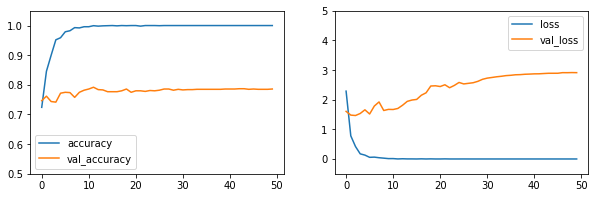

In [33]:
# plot training log

if training:
    test_loss, test_acc = clf_head.evaluate(test_features, test_labels)
    print(f'The test set accuracy of model is {test_acc:.2f}')

    fig, ax = plt.subplots(1,2, figsize=(10,3))
    df_accuracy = pd.DataFrame(history.history).loc[:,['accuracy','val_accuracy']]
    df_loss = pd.DataFrame(history.history).loc[:,['loss','val_loss']]

    df_accuracy.plot(ax=ax[0])
    df_loss.plot(ax=ax[1])
    ax[0].set_ylim(0.5,1.05)
    ax[1].set_ylim(-0.5,5)

    plt.show()

We can see that using a feature extractor did not prevent overfitting, but validation accuracy is better than for a small model with data augmentation from "optional2_DataAugmentation.ipynb" (accuracies are ~0.78-0.80 vs 0.70-0.75 respectively). In addition, the validation accuracy and loss are much more stable than with augmented data and learning is faster.\
Note, that we use low resolution images in this round (60x60 pixels), to reduce training time. For 150x150 pixel images test accuracy is as high as 0.95.

# 3.  Fine-tuning 

The first layers of the convolutional base encode more generic, reusable features like texture, corners, edges, and colour blobs, while layers higher up encode more specialized features like eye, nose, cloth item, etc. In order to improve the performance of the model even further, we can train (or **fine-tune**) the weights of the top layers of the pre-trained model alongside with training of the classifier we've added. This training process will force the weights to be tuned from generic feature maps to features associated specifically with the dataset we are using. However, we should be careful in choosing how many layers of the pre-trained model we want to fine-tune. The pre-trained model has millions of parameters, so the more parameters we are training, the more we are at risk of overfitting the training data, especially if our dataset is small.

Another important thing to remember is that classifier we will be using during fine-tuning should be already trained. If we will add an untrained classifier on the top of the model and at the same time will unfreeze few layers of **conv_base**, the error propagating through the network will be too large and will destroy learned features of unfrozen layers. This is an unwanted outcome, as our aim is to fine-tune (make small changes) the weights of the convolutional base and not to learn them from the scratch.

Summarizing, the steps for fine-tuning the pre-trained model are:

1. Add classifier (dense layers) on the top of the pre-trained model
2. Freeze ALL layers of the pre-trained model 
3. Train classifier
4. Unfreeze FEW layers of the pre-trained model 
5. Train both, unfrozen layers of convolutional base and classifier

<div class=" alert alert-warning">
    <h3><b>Student task. </b>Fine-tuning pre-trained model.</h3>
   
Your task is to:

1. Load pre-trained (with ImageNet weights) conv base and freeze all layers 
2. Add classification head 
3. Compile and train model
4. Unfreeze all conv_base layers
5. Freeze all, but the last 4 layers
6. Compile and train the model with small learning rate
</div>

First, let's create new generators where we enable sample shuffling.

In [34]:
train_ds = tf.data.Dataset.list_files(str(base_dir/'train/*/*.jpg'))
val_ds   = tf.data.Dataset.list_files(str(base_dir/'validation/*/*.jpg'))
test_ds  = tf.data.Dataset.list_files(str(base_dir/'test/*/*.jpg'))


with tf.device('/cpu:0'):
    # Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
    train_ds = train_ds.map(load_image, num_parallel_calls=AUTOTUNE)
    val_ds = val_ds.map(load_image, num_parallel_calls=AUTOTUNE)
    test_ds = test_ds.map(load_image, num_parallel_calls=AUTOTUNE)

    train_ds = configure_for_performance(train_ds, shuffle=True)
    val_ds   = configure_for_performance(val_ds)
    test_ds  = configure_for_performance(test_ds)

<div class=" alert alert-warning">
    <i>1. Load pre-trained (with imagenet weights) conv base & freeze all layers.</i>
</div>

We've already loaded conv base with weights in the student task above. It should be stored in the `conv_base` variable and all layers should be frozen.

<div class=" alert alert-warning">
    <i>2. Add classification head.</i>
    
Build a model containing:
    
- data augmentation layer (defined below)
- conv base (re-use `conv_base`defined above)
- classification head (re-use classification head `clf_head` trained above)
</div>

In [35]:
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomZoom

# data augmentation layer
data_augmentation = tf.keras.Sequential(
    [
        RandomFlip("horizontal", input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        RandomRotation(0.1, fill_mode='constant'),
        RandomZoom(0.1,0.1, fill_mode='constant')
    ]
)

In [36]:
# YOUR CODE HERE
#raise NotImplementedError()

# model = ... # create Sequential object
# model.add(...)  # add data_augmentation layer
# model.add(...)  # add conv_base
# model.add(...)  # add clf_head
model = tf.keras.models.Sequential()
model.add(data_augmentation)
model.add(conv_base)
model.add(clf_head)

In [49]:
# this cell is for tests


<div class=" alert alert-warning">
    <i>3. Compile and train model.</i>
    
Set loss and metrics. Use RMSprop optimizer with default learning rate. Train model using training set (train_ds) and validation set (val_ds) for 5 epochs. 
</div>

In [37]:
# YOUR CODE HERE
#raise NotImplementedError()

# compile the model 

# model.compile(...)
model.compile(optimizer='RMSprop',
              loss='binary_crossentropy',
              metrics='accuracy')

In [51]:
# this cell is for tests


In [52]:
# this cell is for tests


<div class=" alert alert-danger">
    <h3><center>WARNING: Training time ~ 15 min.</center></h3>    
</div>

In [ ]:
%%time

# model training 
if training:
# YOUR CODE HERE
#raise NotImplementedError()
    history = model.fit(train_ds, validation_data=val_ds,batch_size = BATCH_SIZE, epochs = 5, verbose=0)

Notice, that adding data augmentation layer result in decreasing of training accuracy from 1.0 to ~0.80, while validation accuracy did not change significantly. This is expected as data augmentation prevents the model overfitting training data.

<div class=" alert alert-warning">
    <i>4. Unfreeze all conv base layers.</i>
</div>

After you pre-trained classifier unfreeze few layers of the convolutional base. Specifically, unfreeze the last four layers of the VGG-16 model **conv_base** (three convolutional + one pool layers). To do so, you can first unfreeze all layers by setting the parameter `trainable` as `True`:

In [38]:
# unfreeeze all layers
conv_base.trainable = True 

# YOUR CODE HERE
#raise NotImplementedError()

In [39]:
# Sanity check

assert conv_base.trainable==True, "Unfreeze all layers!"
print("Sanity check passed!")

Sanity check passed!


In [ ]:
# this cell is for tests


<div class=" alert alert-warning">
    <i>5. Freeze all conv base layers, except last 4.</i>
</div>

Set `layer.trainable` to False to all **but last 4 layers** by using for loop and iterating list `conv_base.layers`. Do not iterate the last 4 elements of the list as these last layers should remain trainable.

In [ ]:
# YOUR CODE HERE
#raise NotImplementedError()

# freeze all layers except the last 4 
for idx, layer in enumerate(conv_base.layers):
    if idx < len(conv_base.layers) - 4:
        layer.trainable = False
for layer in conv_base.layers:   
    print(layer,"  ",  layer.trainable)

You can check if `trainable` parameter is set correctly:

In [ ]:
# print the trainable status of individual layers
for layer in conv_base.layers:   print(layer,"  ",  layer.trainable)

The `True` flag indicates trainable layers and `False` - freezed layers.

In [45]:
# Sanity check

assert conv_base.layers[-5].trainable==False, "14th layer should not be trainable!"
assert conv_base.layers[-4].trainable==True, "15th layer should be trainable!"
print("Sanity check passed!")

Sanity check passed!


In [ ]:
# this cell is for tests


In [ ]:
# hidden test


In [ ]:
# hidden test


<div class=" alert alert-warning">
    <i>6. Compile and train model.</i>
</div>

Set loss and metrics. Train the model with the RMSprop optimizer, using a very low learning rate `lr=1e-5`. The reason for using a low learning rate is that we want to limit the magnitude of the modifications we make to the representations of the 3 convolutional layers that we are fine-tuning. Updates that are too large may harm these representations.

Set parameter  of `.fit()` function `initial_epoch = initial_epochs`, where `initial_epochs` is set to 5. This parameter specifies the epoch at which to start training. We do not randomly initialize the weight of our dense layers, rather the classifier inherits the weights learned from earlier training. Previously we trained the network for 5 epochs, therefore we will use weights learned at the end of the 5th epoch for our classifier. We will further train the model for more 10 epochs (variable `fine_tune_epochs`). Set `epochs`  to `total_epochs` variable, which is a sum of `initial_epochs` and `fine_tune_epochs` and equals in our case to 15 .

Save trained model as `model_fine_tune.h5`.

In [51]:
initial_epochs   = 5 # number of epoch we used to train the classifier earlier
fine_tune_epochs = 10 # fine-tune the model for 10 epochs (in addition to previous 5 epochs)
total_epochs     =  initial_epochs + fine_tune_epochs

<div class=" alert alert-danger">
    <h3><center>WARNING: Training time ~ 30 min.</center></h3>    
</div>

In [ ]:
%%time

# compile and train the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics='accuracy')
if training:
# YOUR CODE HERE
#raise NotImplementedError()
    history_fine_tune = model(train_ds, validation_data=val_ds,batch_size = BATCH_SIZE, initial_epoch = initial_epochs epochs = total_epochs, verbose=0)
    model.save('model_fine_tune.h5')

Now we will plot accuracy and loss for all epochs - 5 epochs of training while using the pre-trained network as feature extractor and 10 epochs while fine-tuning pre-trained model.

In [52]:
# second if statement is to prevent multiple re-runs of the cells

if training:
    if len(history.history['accuracy']) == initial_epochs:
        # add accuracy and loss of fine-tuned model 
        # to the result obtained in step "3. Compile and train model."
        history.history['accuracy'] += history_fine_tune.history['accuracy']
        history.history['val_accuracy'] += history_fine_tune.history['val_accuracy']

        history.history['loss'] += history_fine_tune.history['loss']
        history.history['val_loss'] += history_fine_tune.history['val_loss']

In [ ]:
# retrieve results on training and validation data
# for all epochs

if training:
    acc      = history.history['accuracy']
    val_acc  = history.history['val_accuracy']
    loss     = history.history['loss']
    val_loss = history.history['val_loss']

In [ ]:
if training:
    test_loss, test_acc = model.evaluate(test_ds)
    print(f'The test set accuracy of model is {test_acc:.2f}')

    plt.figure(figsize=(8, 8))
    epochs = range(1,total_epochs+1,1)

    # plot accuracy
    plt.subplot(2, 1, 1)
    plt.plot(epochs, acc, label='Training')
    plt.plot(epochs, val_acc, label='Validation')
    plt.plot([initial_epochs,initial_epochs],    # plot vertical line
              plt.ylim(), '--k', label='Start Fine Tuning') # indicating the start of fine-tuning

    plt.tick_params(labelbottom=False)
    plt.legend()
    plt.title('Accuracy')

    # plot loss
    plt.subplot(2, 1, 2)
    plt.plot(epochs,loss)
    plt.plot(epochs, val_loss)
    plt.plot([initial_epochs,initial_epochs],    # plot vertical line
             plt.ylim(), '--k', label='Start Fine Tuning')  # indicating the start of fine-tuning

    plt.title('Loss')
    plt.xlabel('epoch')
    plt.show()

We can see that although fine-tuning leads to further overfitting at the end of the training, it has also slightly improved the accuracy of the test dataset from 0.80 to approximately ~0.83. You may further improve the accuracy by training longer (e.g. with Colab GPU) or trying larger learning rate, e.g. 1e-4.\
The overfitting of the network is not necessarily a bad thing and may actually indicate that model can be improved by adjusting hyperparameters or adding regularization.

<div class="wrap-up">
    <div class="wrap-up-title">Wrap up</div><br>
    <div class="wrap-up-content">
        <ul>
          <li>We demonstrated the advantage of transfer learning for smaller data-set applications. By reusing a pre-trained model we can get much better accuracy than with a classifier trained from scratch. </li>
          <li> While using a pre-trained model as a feature extractor, the pre-trained model is "frozen" and only the weights of the newly added classifier get updated during training. </li>
          <li>In the case of the small data, feature extraction with image augmentation helps to avoid overfitting but comes at the cost of higher computational power.</li>
          <li>Fine-tuning helps to adjust the weights such that the network is more specific to the new dataset and thus improves the performance of the model a bit further.</li>
        </ul>
    </div>
</div>

<div class=" alert alert-warning">
    <h3>Question 1.</h3>

The main idea of fine-tuning pre-trained model is :

1. To use the weights learned by training on a large dataset, which is different from the actual training dataset of your application (but of similar type), as the initialization for the training. 

2. To use the weights learned by the network on a smaller reference dataset without further tuning them on the target dataset. 

3. To train a large neural net with initializing all weights to zero. 
    
</div>

In [47]:
# remove the line raise NotImplementedError() before testing your solution and submitting code

# YOUR CODE HERE
#raise NotImplementedError()

answer_1 = 1

In [48]:
# This cell is for tests
assert answer_1 in [1,2,3], '"answer" Value should be an integer between 1 and 3.'
print('Sanity check tests passed!')


Sanity check tests passed!


<div class=" alert alert-warning">
    <h3>Question 2.</h3>

Transfer learning is based on using a pre-trained neural net. Which of the following statement is correct? 

1. Transfer learning works only if the target dataset is larger than the dataset used to obtain the pre-trained neural net. 

2. Transfer learning works only for image data.  

3. The pre-trained neural net should be trained on data with similar statistical properties as the target data.     
</div>

In [49]:
# remove the line raise NotImplementedError() before testing your solution and submitting code

# YOUR CODE HERE
# raise NotImplementedError()

answer_2 = 3

In [50]:
# This cell is for tests
assert answer_2 in [1,2,3], '"answer" Value should be an integer between 1 and 3.'
print('Sanity check tests passed!')


Sanity check tests passed!


<div class=" alert alert-warning">
    <h3>Question 3.</h3>

The fastest way to use a pre-trained model is:

1. Unfreeze few convolutional base layers and train these layers with classifier on target data

2. Separately extract features of target data from the convolutional base of the pre-trained model and feed them to the classifier

3. Use a frozen convolutional base of the pre-trained model and train only layers of the classifier by passing the target data through the whole network

4. Unfreeze all layers of pre-trained model and train with target data   
</div>

In [ ]:
# remove the line raise NotImplementedError() before testing your solution and submitting code

# YOUR CODE HERE
#raise NotImplementedError()


In [ ]:
# This cell is for tests
assert answer_3 in [1,2,3,4], '"answer" Value should be an integer between 1 and 4.'
print('Sanity check tests passed!')


<div class=" alert alert-warning">
    <h3>Question 4.</h3>
    
It is better to unfreeze few last layers of the convolutional base when the data used for training pre-trained network and target data are:

1. of different types (very different)

2. highly similar

3. somewhat similar
    
</div>

In [ ]:
# remove the line raise NotImplementedError() before testing your solution and submitting code

# YOUR CODE HERE
#raise NotImplementedError()

answer_4 = 3

In [ ]:
# This cell is for tests
assert answer_4 in [1,2,3], '"answer" Value should be an integer between 1 and 3.'
print('Sanity check tests passed!')
